* [Analyse univariée](#au)
* [Analyse bivariée](#ab)
* [Analyse multivariée (PCA,ANOVA)](#am)

In [1]:
#!pip install researchpy

In [2]:
 #!pip install pingouin


In [3]:
#!pip install mlxtend 

In [4]:
import pandas as pd #(Vaex – Faster Pandas Alternate in Python)
import numpy as np
from hurry.filesize import size
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn')
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#import pingouin as pg
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
#from sklearn.decomposition import PCA

import scipy.stats as stats
from mlxtend.plotting import plot_pca_correlation_graph
from functions2 import*

from sklearn import preprocessing 
from sklearn import decomposition
from functions import *

C:\Users\IMEN\.conda\envs\geo_env\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('data_exploration.csv',sep='\t')

<AxesSubplot:>

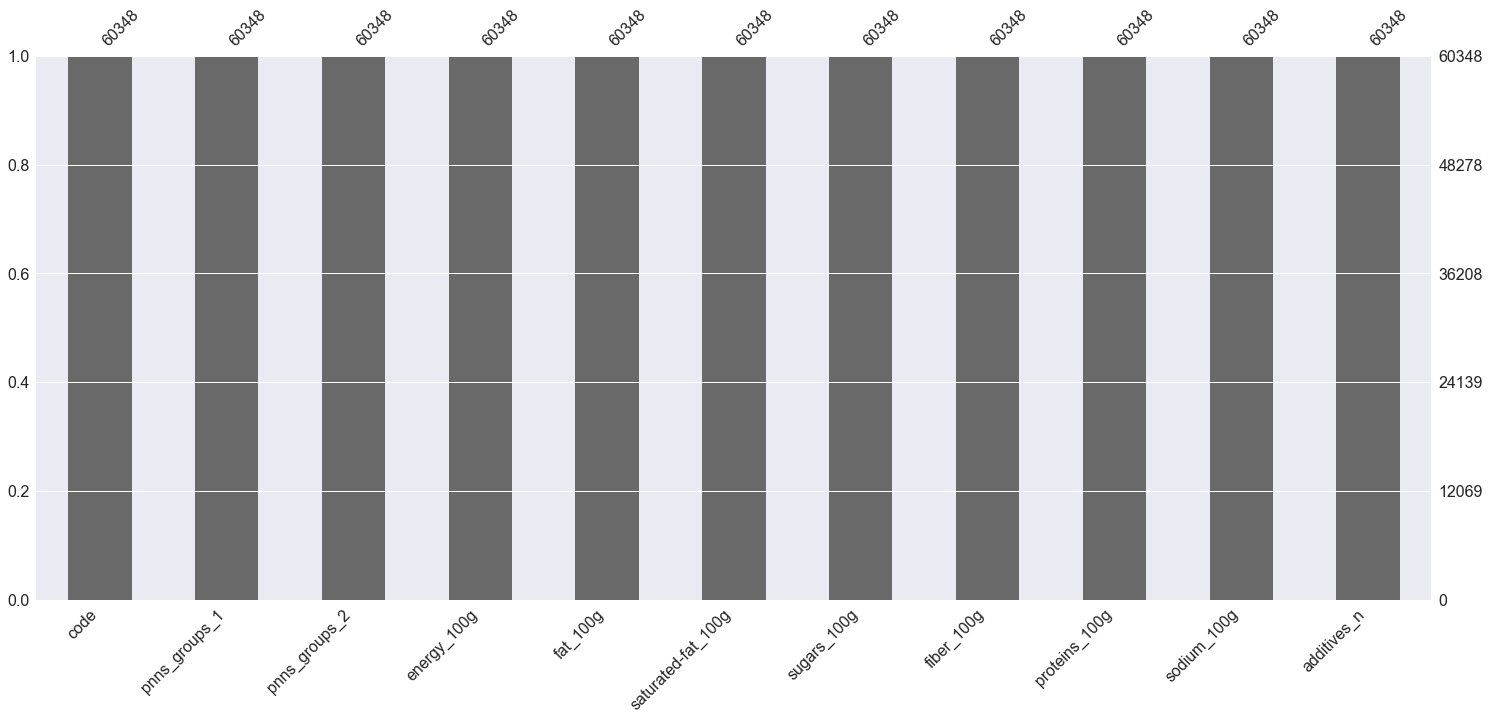

In [7]:
msno.bar(df)

In [8]:
def print_memory(dataframe):
    #Memory consumption
    df_memory = dataframe.memory_usage().sum()
    # Let's print out the memory consumption
    print('Total Current memory is-', df_memory,'Bytes.','===>',size(df_memory))

In [9]:
print_memory(df)

Total Current memory is- 5310752 Bytes. ===> 5M


# Analyse univariée <a class="anchor" id="au"></a>
## Données catégorielles

In [10]:
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,additives_n
count,60348.000000,60348.000000,60348.000000,60348.000000,60348.000000,60348.000000,60348.000000,60348.00000
mean,1027.198399,12.476941,4.726299,10.736564,1.860767,7.485736,0.164670,1.25285
std,606.585391,12.368835,4.803228,11.580744,1.009357,5.234063,0.258171,2.26395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,628.000000,3.720000,1.200000,2.600000,1.860767,4.800000,0.000000,0.00000
50%,1011.322562,12.234138,4.643393,10.736564,1.860767,7.485736,0.003937,0.00000
75%,1148.000000,12.234138,4.643393,10.736564,1.860767,7.485736,0.295276,2.00000
max,4579.545634,100.000000,31.000000,85.000000,8.000000,37.000000,1.732283,31.00000


In [11]:
# add a column contains_additives.It takes 0 if additives_n=1 else it takes 1

In [12]:
df["contains_additives"]=pd.Series(np.where(df.additives_n>0,1,0)).astype(int)

In [13]:
#Let's take a look at what part of the products actually contain additives. I'm going to apply grouping on the contains_additives column and change the index names for clarity.
#There should be only two classes here.
products_with_additives=df["contains_additives"].groupby(df["contains_additives"]).count()
products_with_additives

contains_additives
0    37047
1    23301
Name: contains_additives, dtype: int64

In [14]:

products_with_additives.index=["don't contain additives","contain additives"]
#assert_equal(len(products_with_additives),2)

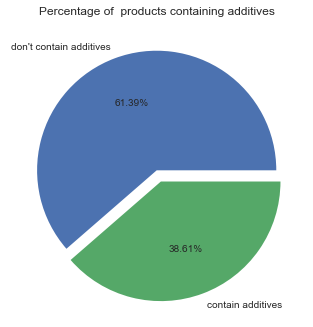

In [15]:
plot_pie_on_grouped_data(products_with_additives,"Percentage of  products containing additives",(0,0.1))

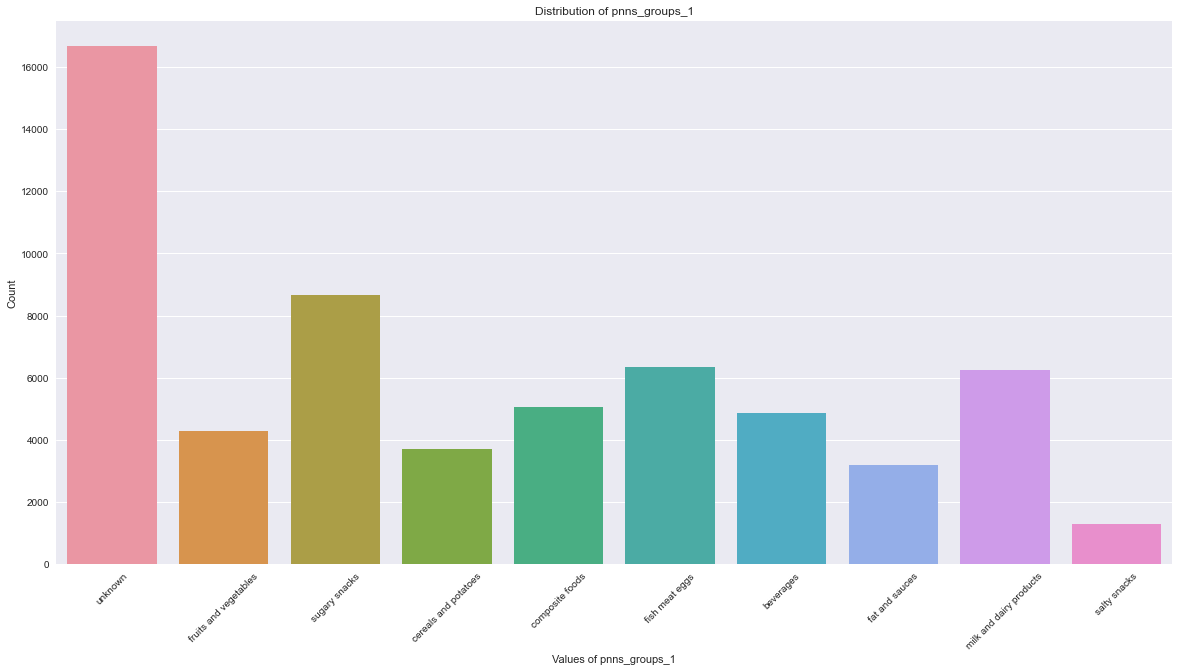

In [16]:
plot_countplot_categoriel_feature(df,'pnns_groups_1',20,10)

## Données numériques

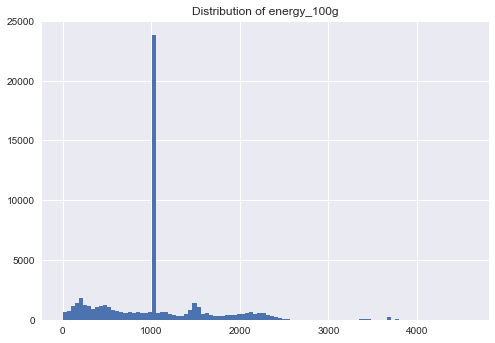

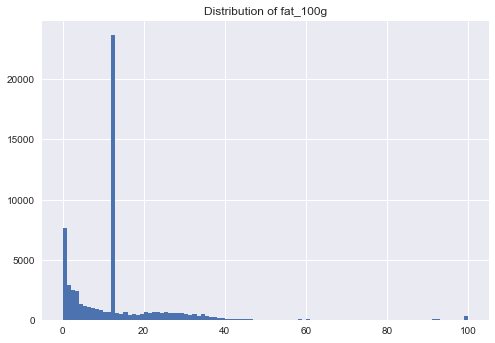

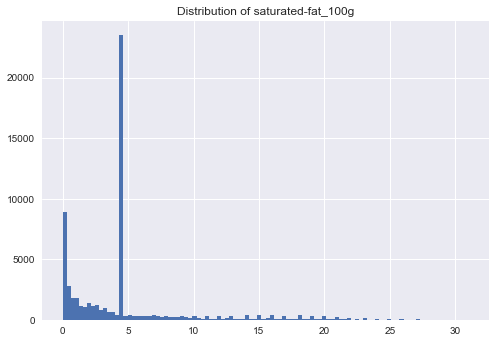

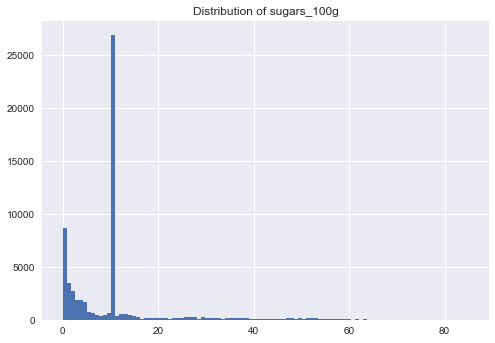

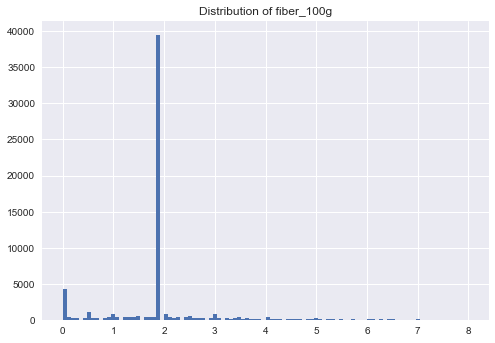

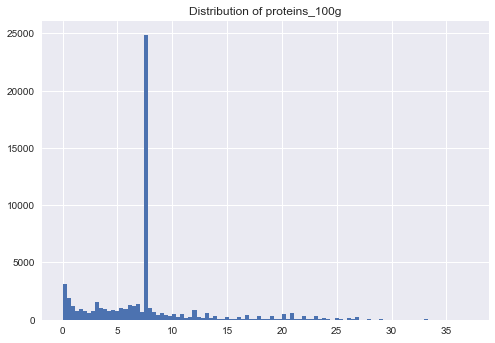

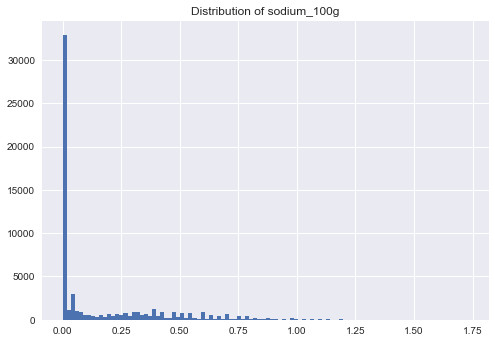

In [17]:
#
numeric_features_100g=['energy_100g', 'fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g']
#plot_histogram_numerical_feature(df,'energy_100g',100)
for nf in numeric_features_100g:
    plot_histogram_numerical_feature(df,nf,100)

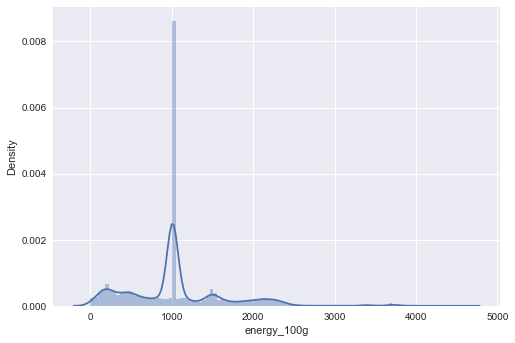

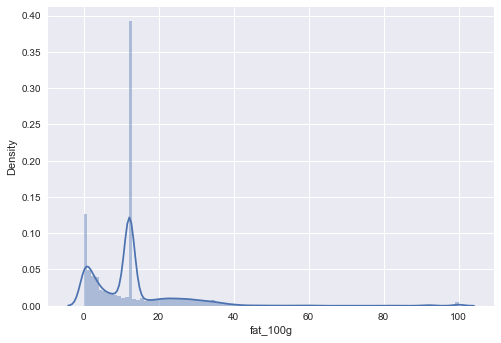

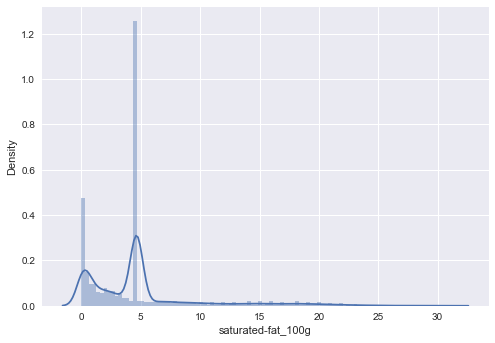

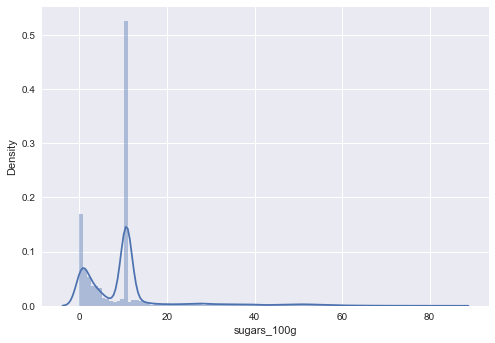

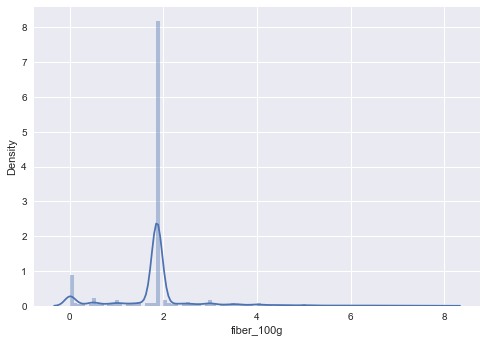

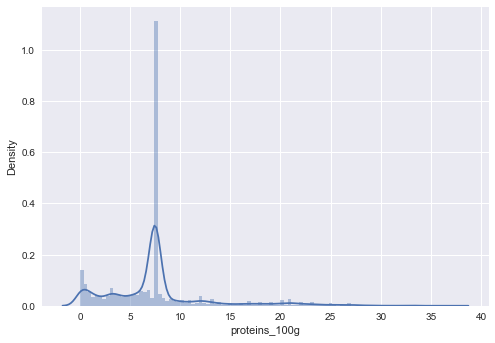

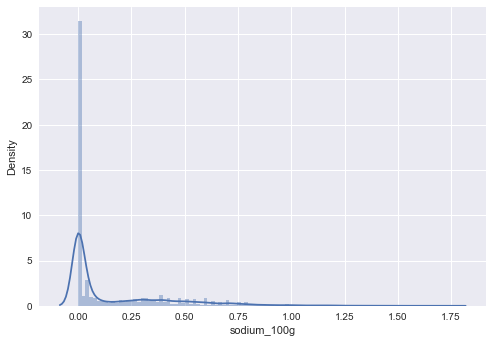

In [18]:

#plot_histogram_numerical_feature(df,'energy_100g',100)
for nf in numeric_features_100g:
    plot_second_histogram_numerical_feature(df,nf,100)

# Analyse bivariée <a class="anchor" id="ab"></a>

## Numérique et numérique

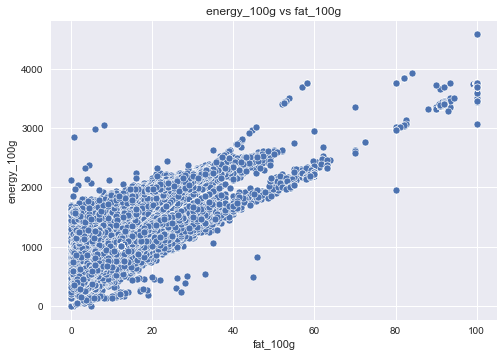

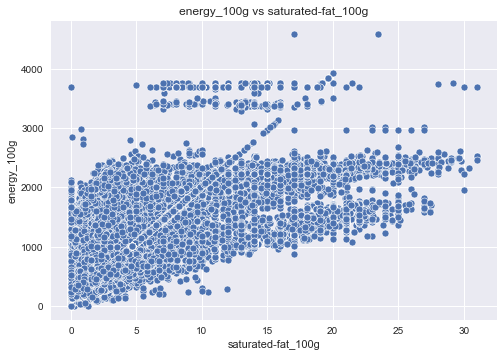

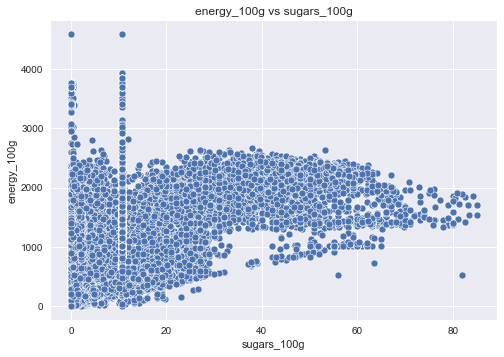

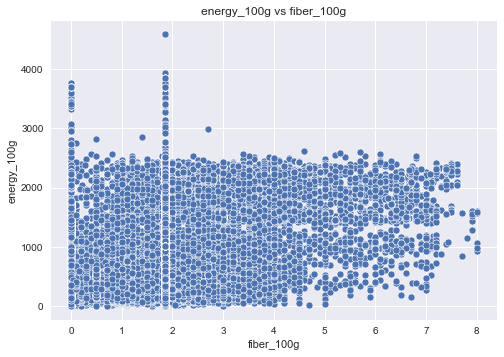

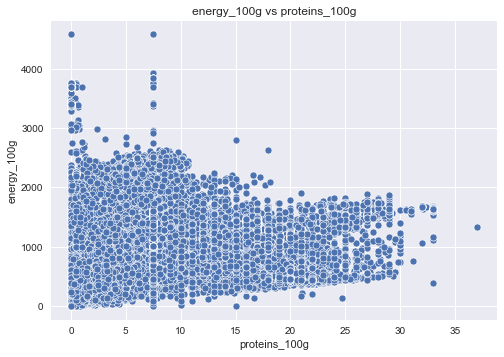

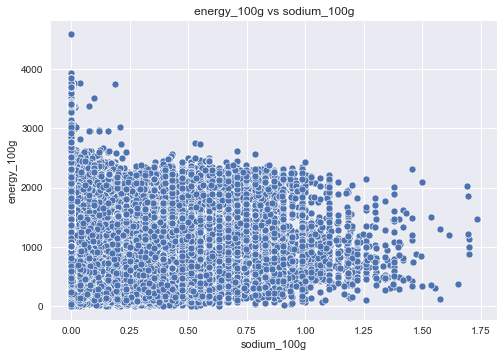

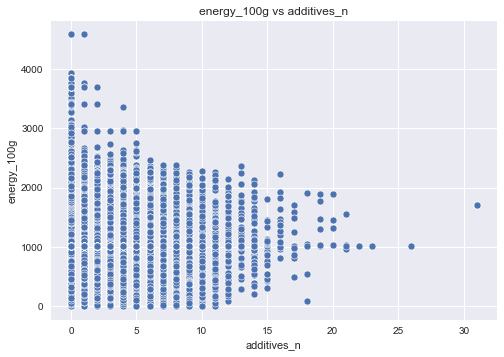

In [19]:
#Nuage de points
#['energy_100g', 'fat_100g','saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g','sodium_100g', 'fruits-vegetables-nuts_100g', 'additives_n']
#pd.crosstab(df['energy_100g'], df['sugars_100g'])
ing_to_test_with_energy=['fat_100g','saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g','sodium_100g', 'additives_n']
for ing in ing_to_test_with_energy:
    title='energy_100g vs '+ing
    plt.title(title)
    sns.scatterplot( df[ing],df['energy_100g'])#bivarié
#sns.scatterplot(df['fat_100g'], df['saturated-fat_100g'],hue=df['energy_100g'])#multivarié
    plt.show()

## Numérique et catégoriel

In [88]:
len(df["pnns_groups_1"].unique())

10

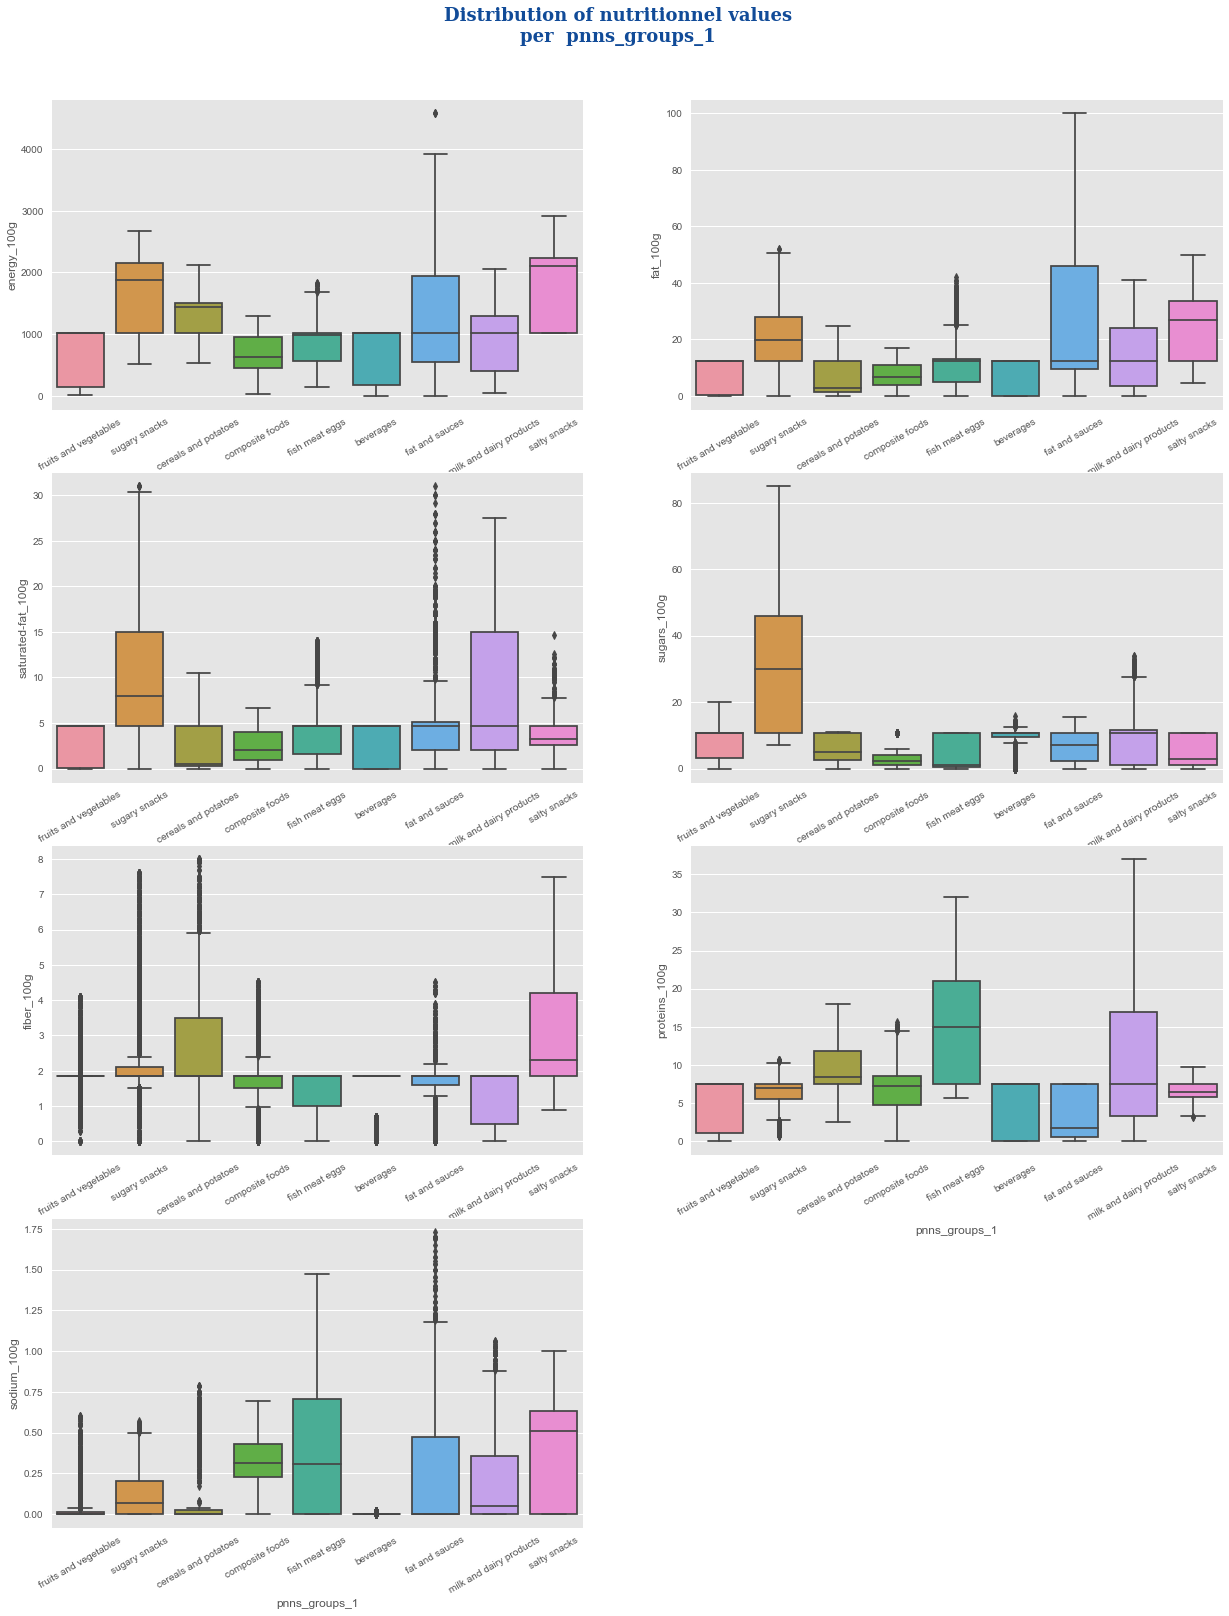

In [23]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,40))
font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sub = 0
for i in range(len(numeric_features_100g)):
    fig.add_subplot(6,2,i+1)
    colonne = numeric_features_100g[i]
    ax = sns.boxplot(x="pnns_groups_1", y=colonne, data=df[df["pnns_groups_1"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution of nutritionnel values" "\n" "per  pnns_groups_1", ha="center", 
         fontdict=font_title)
plt.show()
fig.savefig('distribution_box.png', format="png")

# Analyse multivariée (PCA, ANOVA) <a class="anchor" id="am"></a>

In [24]:
list_pnss_group1=df["pnns_groups_1"].unique().tolist()
list_pnss_group2=df["pnns_groups_2"].unique().tolist()

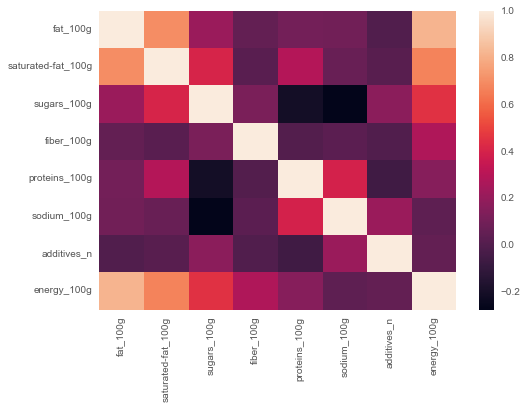

In [62]:
#look for correlated variables
sns.heatmap(df[ing_to_test_with_energy+['energy_100g']].corr());

In [90]:
df[ing_to_test_with_energy+['energy_100g']].corr()

,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,additives_n,energy_100g
fat_100g,1.000000,0.698370,0.215207,0.050673,0.097897,0.095438,-0.002929,0.818107
saturated-fat_100g,0.698370,1.000000,0.402026,0.020042,0.286752,0.065761,0.013121,0.666106
sugars_100g,0.215207,0.402026,1.000000,0.117413,-0.209270,-0.277154,0.171791,0.446968
fiber_100g,0.050673,0.020042,0.117413,1.000000,-0.000068,0.025298,-0.006670,0.274272
proteins_100g,0.097897,0.286752,-0.209270,-0.000068,1.000000,0.392686,-0.061861,0.154659
sodium_100g,0.095438,0.065761,-0.277154,0.025298,0.392686,1.000000,0.212382,0.036047
additives_n,-0.002929,0.013121,0.171791,-0.006670,-0.061861,0.212382,1.000000,0.048660
energy_100g,0.818107,0.666106,0.446968,0.274272,0.154659,0.036047,0.048660,1.000000


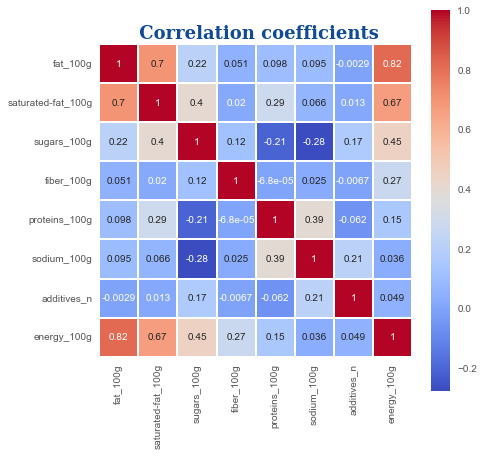

In [94]:
#Coefficients de  corrélations
corr_mat = df[ing_to_test_with_energy+['energy_100g']].corr()
#heatmap
fig = plt.figure(figsize=(7,7))
sns.heatmap(corr_mat, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
#plt.title("Coefficients de corrélation de Pearson", fontdict=font_title)
plt.title(" Correlation coefficients", fontdict=font_title)
plt.show()

### PCA

In [26]:
X=df[numeric_features_100g].values

In [28]:
# choix du nombre de composantes à calculer
n_comp = 3

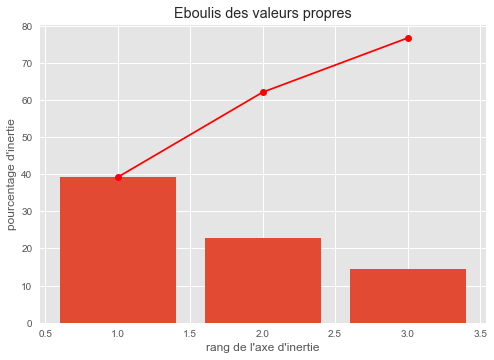

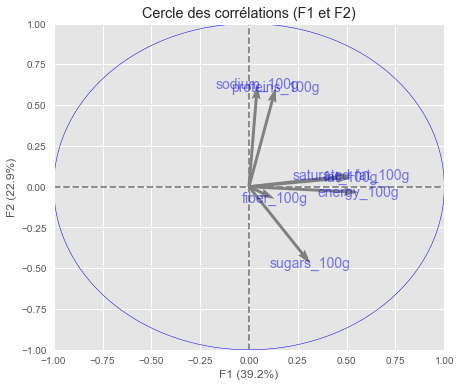

In [59]:

# Centrage et Réduction
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)
#scree = pca.explained_variance_ratio_*100 :[39.19123475 22.87474005 14.58607381]

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)],labels = np.array(numeric_features_100g))







**Note**
<br>
Scree plot:<br>
si on résume les 7 variables intiales du jeu de données par 2 dimenssiosn(F1 et f2) on récupère 24;%+39,%=63;% de l'information contenue dans tout le tableau
<br>

Corrélation circle:<br>

In [30]:
data=df[numeric_features_100g]
df_pca=pd.DataFrame(X_scaled,columns=data.columns,index=data.index)
df_pca

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g
0,-0.026173,-0.019630,-0.017261,0.000000,-2.199880e-16,0.000000,-0.637840
1,-0.026173,-0.019630,-0.017261,0.000000,-2.199880e-16,0.000000,-0.637840
2,0.748131,-0.671608,0.498266,0.000000,4.299043e+00,-0.236097,-0.637840
3,0.218935,-0.919006,-0.914663,-0.831263,3.559054e-01,0.480370,1.686219
4,-0.026173,-0.019630,-0.017261,0.000000,-2.199880e-16,0.000000,-0.637840
...,...,...,...,...,...,...,...
60343,-0.026173,-0.019630,-0.017261,0.000000,-2.199880e-16,0.000000,-0.637840
60344,-0.026173,-0.019630,-0.017261,0.000000,-2.199880e-16,0.000000,-0.637840
60345,-0.026173,-0.019630,-0.017261,0.000000,-2.199880e-16,0.000000,-0.637840
60346,-0.026173,-0.019630,-0.017261,0.000000,-2.199880e-16,0.000000,-0.637840


In [31]:
X_projected = pca.transform(X_scaled)
df_pca=pd.DataFrame(X_projected,index=data.index,columns=["F"+str(i+1) for i in range(3)])
df_pca

,F1,F2,F3
0,-0.061305,-0.401063,-0.090113
1,-0.061305,-0.401063,-0.090113
2,0.831734,-0.891772,4.054096
3,-0.914808,1.589377,0.944651
4,-0.061305,-0.401063,-0.090113
...,...,...,...
60343,-0.061305,-0.401063,-0.090113
60344,-0.061305,-0.401063,-0.090113
60345,-0.061305,-0.401063,-0.090113
60346,-0.061305,-0.401063,-0.090113


In [44]:
print_memory(df_pca)

Total Current memory is- 1448480 Bytes. ===> 1M


**Note**
<br>
df_pca can be used as the new dataset for modeling with a machine learning technique



In [70]:
def equation_pca(f,name):
    #f1=pcs[0]
    f = sorted(f, key = float)
    #fi is a linear combinaison of ',numeric_features_100g
    ch=name+'='
    s=''
    for cp in range(0,len(f)):       
            ch=ch+str(round(f,3))+'*'+str(numeric_features_100g[cp])+'\n   '
        
    #ch = ch.rstrip(ch[-1])  
    print(ch)

In [67]:
f1=pca.components_[0]
print(f1)
    

[0.56050099 0.52511398 0.52272962 0.3146462  0.13125745 0.13705625
 0.04280797]


In [74]:
ch='F1='
f1=pca.components_[0]
for cp in range(0,len(f1)):       
            ch=ch+str(round(f1[cp],3))+'*'+str(numeric_features_100g[cp])+'\n   '
print (ch)

F1=0.561*energy_100g
   0.525*fat_100g
   0.523*saturated-fat_100g
   0.315*sugars_100g
   0.131*fiber_100g
   0.137*proteins_100g
   0.043*sodium_100g
   


In [75]:
ch='F2='
f2=pca.components_[1]
for cp in range(0,len(f2)):       
            ch=ch+str(round(f2[cp],3))+'*'+str(numeric_features_100g[cp])+'\n   '
print (ch)

F2=-0.034*energy_100g
   0.058*fat_100g
   0.07*saturated-fat_100g
   -0.472*sugars_100g
   -0.074*fiber_100g
   0.608*proteins_100g
   0.626*sodium_100g
   



### ANOVA


In [ ]:
#Create a boxplot
df.boxplot('energy_100g', by='pnns_groups_2', figsize=(25, 15),rot=90)

In [53]:
#ONE-WAY ANOVA USING SCIPY.STATS
#tests if h0:the mean of an ingredient is equal between 2 or more groups of pnns_groups_2 
F,pvalue=stats.f_oneway(df[df['pnns_groups_2']==list_pnss_group2[1]]['energy_100g'],
               df[df['pnns_groups_2']==list_pnss_group2[2]]['energy_100g'],
               df[df['pnns_groups_2']==list_pnss_group2[3]]['energy_100g'])


In [56]:
print('the ratio F=',F,'\n')
print('the pvalue pvalue=',pvalue,'\n')

the ratio F= 46.54389090112601 

the pvalue pvalue= 1.0161171759238298e-20 



**NOTE** 

<br>
pvalues are numbers between 0 and 1 thant quantify how confident a one group is different from other
<br>
The ratio F=varaince between groups/variance withing groups.
<br>
The larger the F,the more likely it is that groups have different means(rejct H0)

Here the  pvalue <5% this rejects the null hypothesis of equality of means of energy_100g  between at least 2 of the mentioned 3 groups of pnns_groups_2
Which the case when lookin to the boxplot

In [57]:
#rp.summary_cont(df['energy_100g'].groupby(df['pnns_groups_2']))